* Load the dataset and conduct any necessary preprocessing, such as normalizing the data.
* Apply UMAP to the data.
* Using the two-dimensional UMAP representation, draw a graph of the data by coloring and labeling the data points as you did in the checkpoint.
* Do you think that the UMAP solution is satisfactory? Can you easily distinguish between the different classes? Which algorithm produced better results, UMAP or the others (t-SNE or PCA) that you applied in the assignments from the previous checkpoints?
* Now, play with the different hyperparameter values of the UMAP, and apply UMAP for each of them. Which combination is the best in terms of the two-dimensional representation clarity?


In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import umap
import warnings
warnings.filterwarnings("ignore")

In [2]:
mnist = fetch_openml('Fashion-MNIST', version=1, cache=True)
indices = np.random.choice(70000,10000)
X = mnist.data[indices] / 255.0 #normalizing
y = mnist.target[indices]

In [3]:
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

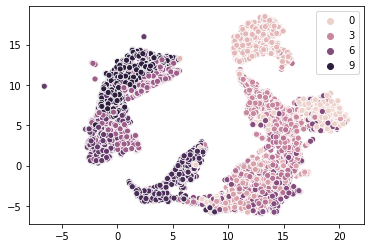

In [4]:
sns.scatterplot(x=umap_results[:,0], y=umap_results[:,1], hue=y)

I'd say it's about as useful as TSNE, but much faster. But the classes aren't all clearly distinguishable.

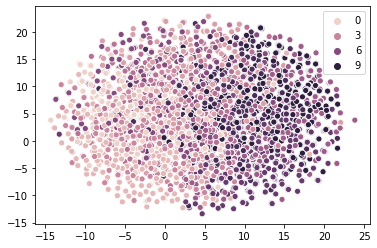

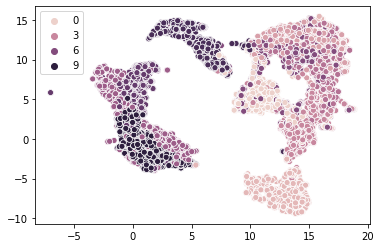

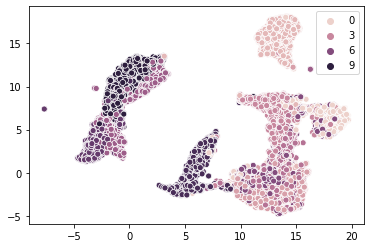

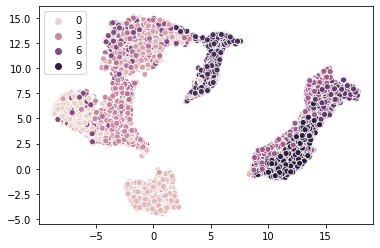

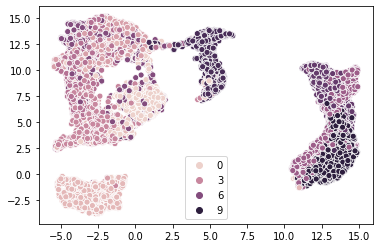

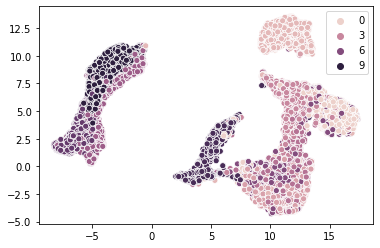

In [6]:
for n in range(2,22,5):
    umap_results = umap.UMAP(n_neighbors=n,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)
    sns.scatterplot(x=umap_results[:,0], y=umap_results[:,1], hue=y)
    plt.show()

0.1


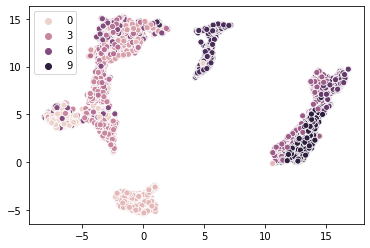

0.5


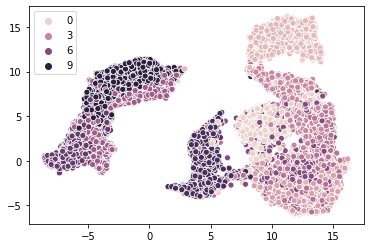

1


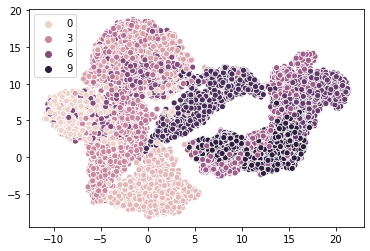

In [9]:
ds=[.1,.5,1]
for d in ds:
    umap_results = umap.UMAP(n_neighbors=10,
                      min_dist=d,
                      metric='correlation').fit_transform(X)
    print(d)
    sns.scatterplot(x=umap_results[:,0], y=umap_results[:,1], hue=y)
    plt.show()

Seems like a low minimum distance (say, .1) and a higher (around 10) n neighbors is optimal